In [128]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import time
import random


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# data splitting
from sklearn.model_selection import train_test_split, cross_validate

# models
from sklearn import ensemble, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import roc_auc_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# common helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [129]:
# data loading
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [130]:
data = [train, test]

In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
389,1281,3,"Palsson, Master. Paul Folke",male,6.00,3,1,349909,21.0750,NaN,S
92,984,1,"Davidson, Mrs. Thornton (Orian Hays)",female,27.00,1,2,F.C. 12750,52.0000,B71,S
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.00,0,0,347471,7.8542,NaN,S
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.00,0,0,113059,47.1000,NaN,S


In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [134]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [136]:
# unique values and ranges

print("Survived:", train["Survived"].unique())
print("Pclass:", train["Pclass"].unique())
print("Sex:", train["Sex"].unique())
print("Age:", train["Age"].min(),'-', train["Age"].max())
print("SibSp:", train["SibSp"].min(), '-', train["SibSp"].max())
print("Parch:", train["Parch"].min(), '-', train["Parch"].max())
print("Fare:", train["Fare"].min(), '-', train["Fare"].max())
print("Embarked:", train["Embarked"].unique())

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
Age: 0.42 - 80.0
SibSp: 0 - 8
Parch: 0 - 6
Fare: 0.0 - 512.3292
Embarked: ['S' 'C' 'Q' nan]


## **Numerical and Categorical Features**

In [137]:
# numerical variables

num_vars = train.select_dtypes(np.number).columns.to_list()
print("Numerical variables:", num_vars)
print("Total:", len(num_vars))

Numerical variables: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Total: 7


In [138]:
# discrete variables

disc_vars = [var 
             for var in num_vars 
             if train[var].nunique() < 10 and var not in ['PassengerId']]
print("Discrete variables:", disc_vars)
print("Total:", len(disc_vars))

Discrete variables: ['Survived', 'Pclass', 'SibSp', 'Parch']
Total: 4


In [139]:
# continuous variables

cont_vars = [var 
             for var in set(num_vars).difference(set(disc_vars +['PassengerId']))]
print("Continuous variables:", cont_vars)
print("Total:", len(cont_vars))

Continuous variables: ['Fare', 'Age']
Total: 2


In [140]:
# categorical variables

cat_vars = train.select_dtypes(include=['object']).columns.to_list()
print("Categorical variables:", cat_vars)
print("Total:", len(cat_vars))

Categorical variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Total: 5


In [141]:
# cardinality of categorical variables

for var in cat_vars:
    print(var, '->', f'#{train[var].nunique()}')

Name -> #891
Sex -> #2
Ticket -> #681
Cabin -> #147
Embarked -> #3


# **Data Cleaning**

* Correcting
* Completing
* Creating
* Converting

### Correcting

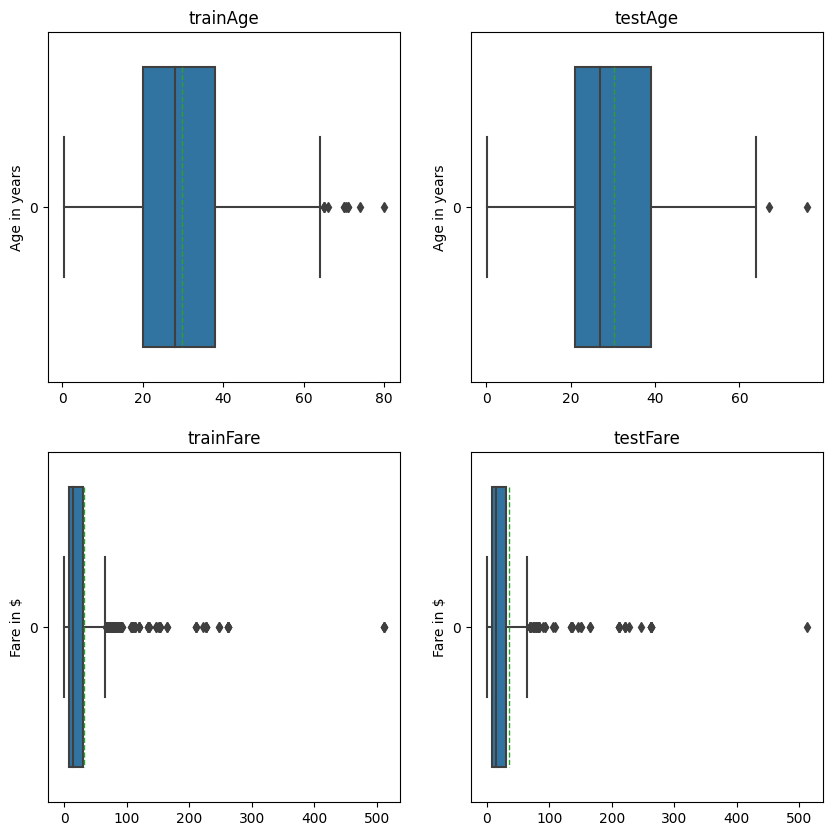

In [142]:
# data correction

plt.figure(figsize=[10, 10])

plt.subplot(221)
sns.boxplot(train["Age"], orient="h", showmeans=True, meanline=True)
plt.title("trainAge")
plt.ylabel("Age in years")

plt.subplot(222)
sns.boxplot(test["Age"], orient="h", showmeans=True, meanline=True)
plt.title("testAge")
plt.ylabel("Age in years")

plt.subplot(223)
sns.boxplot(train["Fare"], orient="h", showmeans=True, meanline=True)
plt.title("trainFare")
plt.ylabel("Fare in $")

plt.subplot(224)
sns.boxplot(test["Fare"], orient="h", showmeans=True, meanline=True)
plt.title("testFare")
plt.ylabel("Fare in $");

In [143]:
# outliers needed as they're in test-set as well
# no correction required

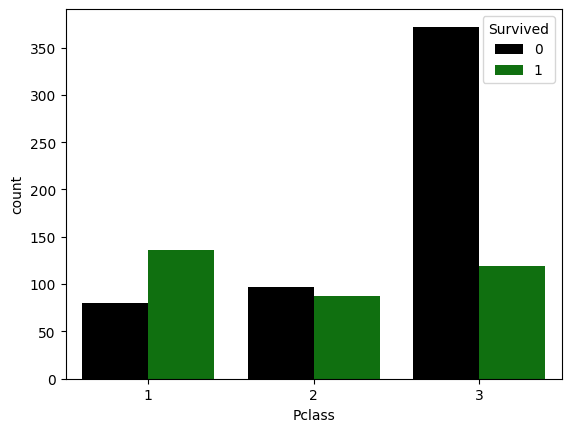

In [144]:
sns.countplot(train, x="Pclass", hue="Survived", palette={0: "black", 1: "green"});

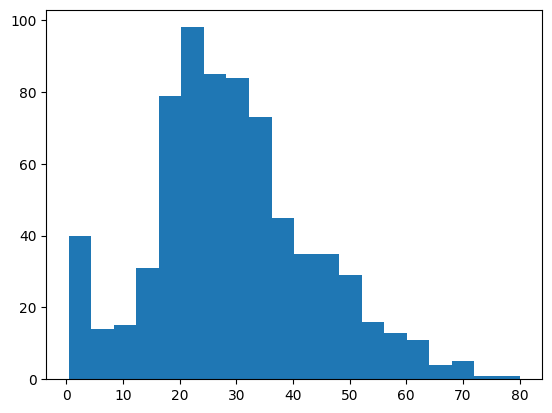

In [145]:
# age distribution

plt.hist(train["Age"], bins=20);

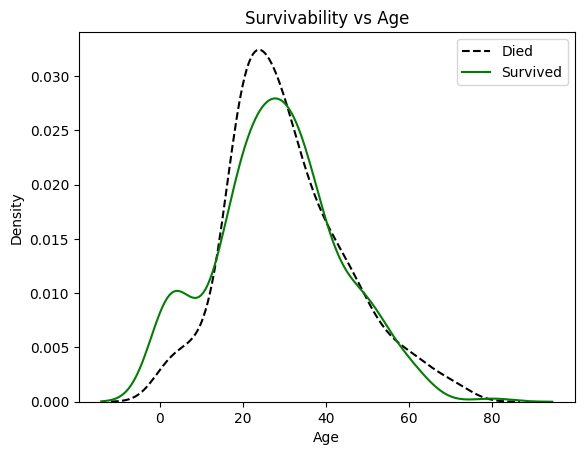

In [146]:
# survivability vs age

sns.kdeplot(train["Age"][train["Survived"] == 0], 
            color="black", label="Died", linestyle="--")
sns.kdeplot(train["Age"][train["Survived"] == 1], 
            color="green", label="Survived")

plt.title("Survivability vs Age")
plt.legend();

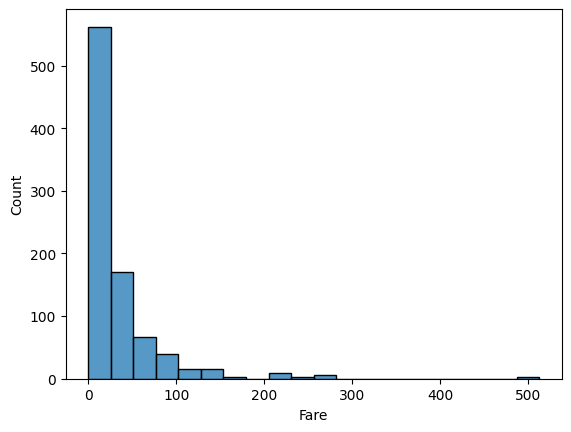

In [147]:
# fare distribution

sns.histplot(train["Fare"], bins=20);

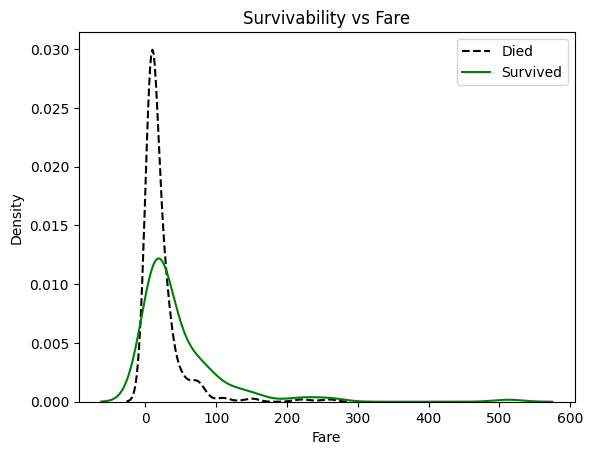

In [148]:
# survivability vs fare

sns.kdeplot(train["Fare"][train["Survived"] == 0], 
            color="black", label="Died", linestyle="--")
sns.kdeplot(train["Fare"][train["Survived"] == 1], 
            color="green", label="Survived")

plt.title("Survivability vs Fare")
plt.legend();

### Survivability vis a vis discrete numerical features

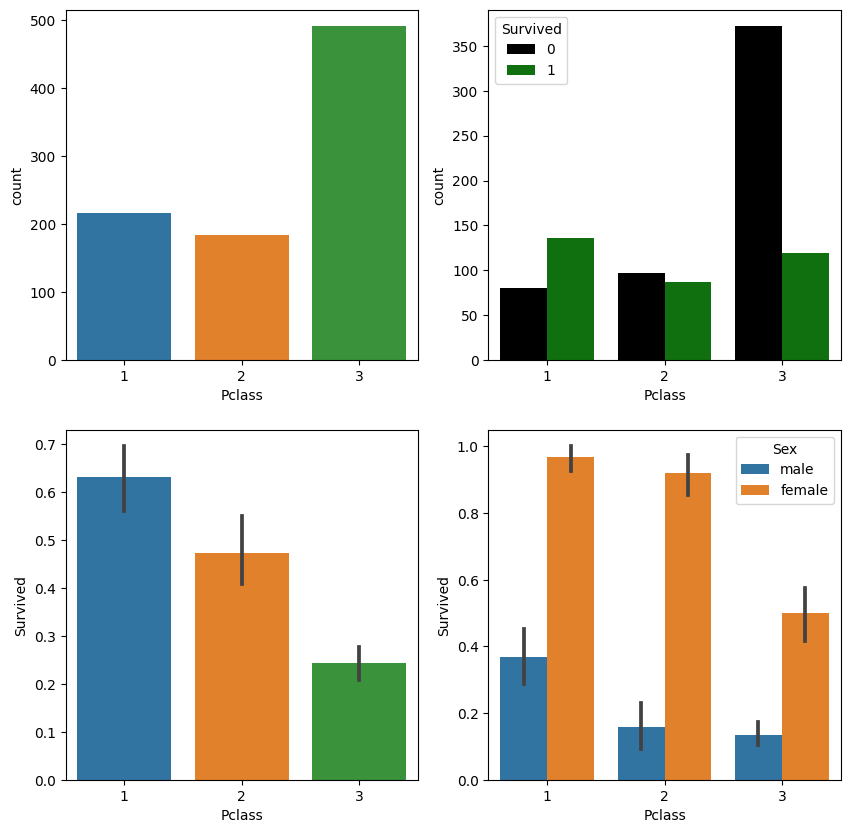

In [149]:
# survivability vs passenger class

plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.countplot(data=train, x="Pclass")

plt.subplot(222)
sns.countplot(train, x="Pclass", hue="Survived", palette={0: "black", 1: "green"})

plt.subplot(223)
sns.barplot(data=train, x="Pclass", y="Survived")

plt.subplot(224)
sns.barplot(data=train, x="Pclass", y="Survived", hue="Sex");

In [150]:
# class 1 had better survival probability
# females had better survival probability

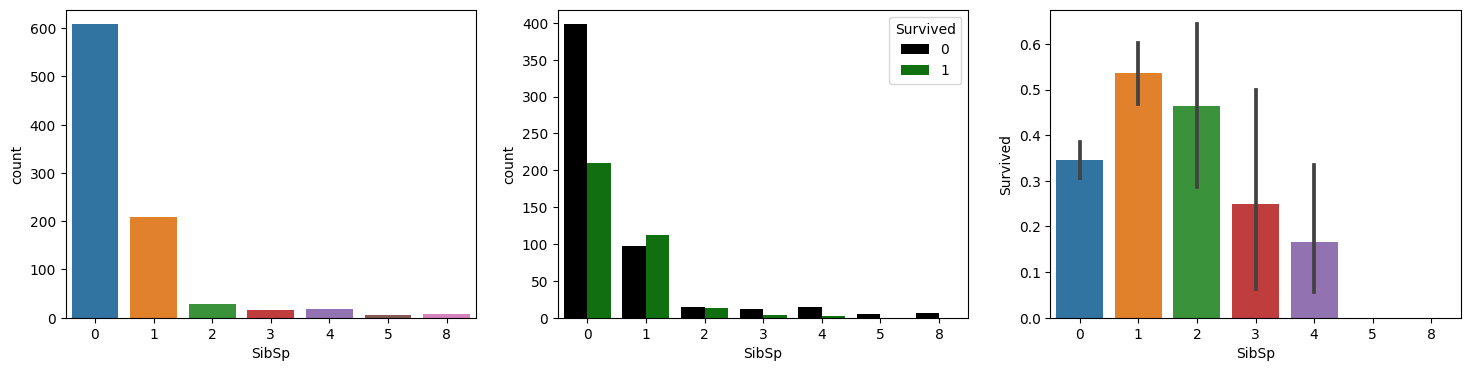

In [151]:
# survivability with siblings/spouse

plt.figure(figsize=(18, 4))

plt.subplot(131)
sns.countplot(train, x="SibSp")

plt.subplot(132)
sns.countplot(train, x="SibSp", hue="Survived", palette={0: "black", 1: "green"})

plt.subplot(133)
sns.barplot(train, x="SibSp", y="Survived");

In [152]:
# people with 1 or 2 siblings and/or spouse had better survival change

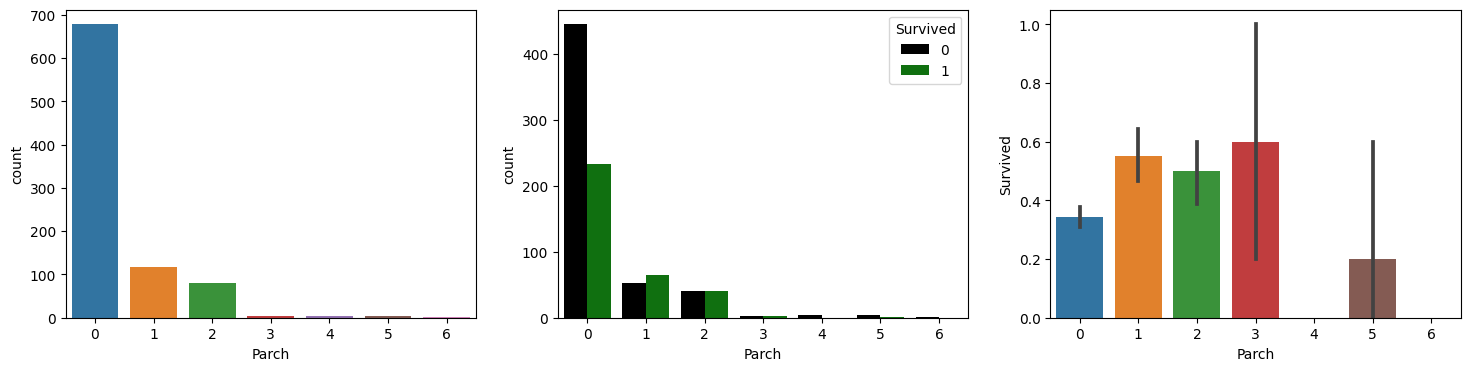

In [153]:
# survivability with parents/children

plt.figure(figsize=(18, 4))

plt.subplot(131)
sns.countplot(train, x="Parch")

plt.subplot(132)
sns.countplot(train, x="Parch", hue="Survived", palette={0: "black", 1: "green"})

plt.subplot(133)
sns.barplot(train, x="Parch", y="Survived");

In [154]:
# people who were alone, though large in number, had less survival chance
# new column "isAlone" as it is a major deciding factor
# new column "Family" which is SibSp + Parch

In [155]:
train.Name.where((train.Survived == 1) & (train.Sex == "male")).count()

109

### Survivability vis a vis categorical features

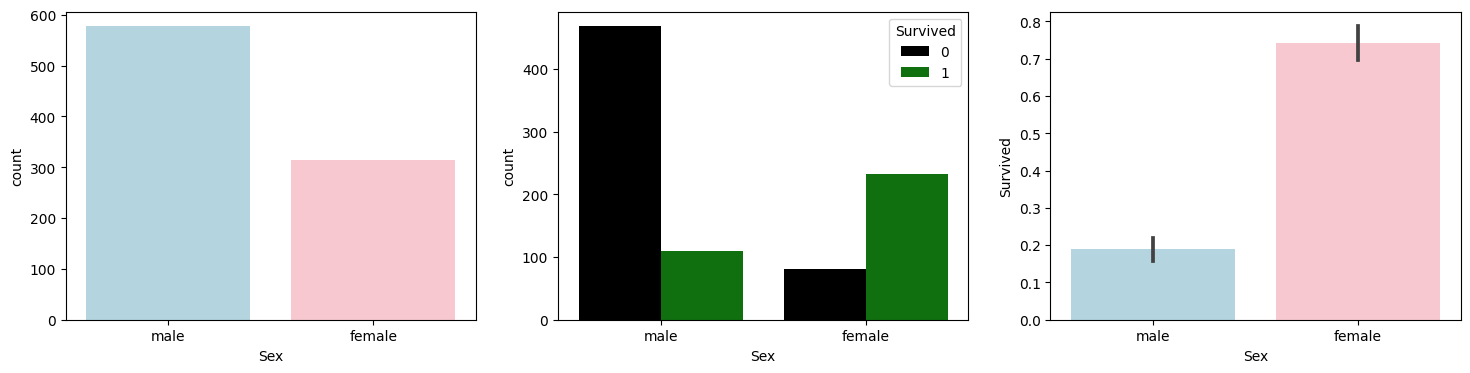

In [156]:
# survivability vs sex

plt.figure(figsize=(18, 4))

plt.subplot(131)
sns.countplot(train, x="Sex", palette={"male": "lightblue", "female": "pink"})

plt.subplot(132)
sns.countplot(train, x="Sex", hue="Survived", palette={0: "black", 1: "green"})

plt.subplot(133)
sns.barplot(train, x="Sex", y="Survived", palette={"male": "lightblue", "female": "pink"});

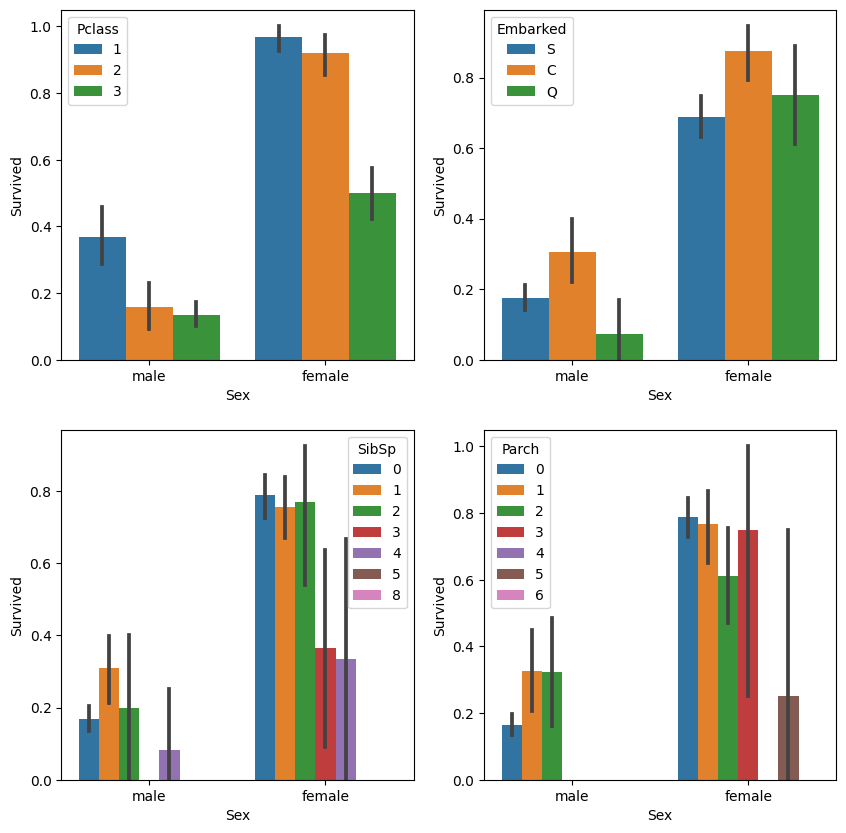

In [157]:
# survivability vs (sex & other feature)

plt.figure(figsize=(10, 10))

plt.subplot(221)
sns.barplot(train, x="Sex", y="Survived", hue="Pclass")

plt.subplot(222)
sns.barplot(train, x="Sex", y="Survived", hue="Embarked")

plt.subplot(223)
sns.barplot(train, x="Sex", y="Survived", hue="SibSp")

plt.subplot(224)
sns.barplot(train, x="Sex", y="Survived", hue="Parch");

### Completion (Imputation)

In [158]:
na_vars = [var for var in train.columns if train[var].isnull().sum()]
[print(train[var].isnull().sum() ,"Missing values in", var, round((train[var].isnull().sum()/891)*100, 2), "%") for var in na_vars];

177 Missing values in Age 19.87 %
687 Missing values in Cabin 77.1 %
2 Missing values in Embarked 0.22 %


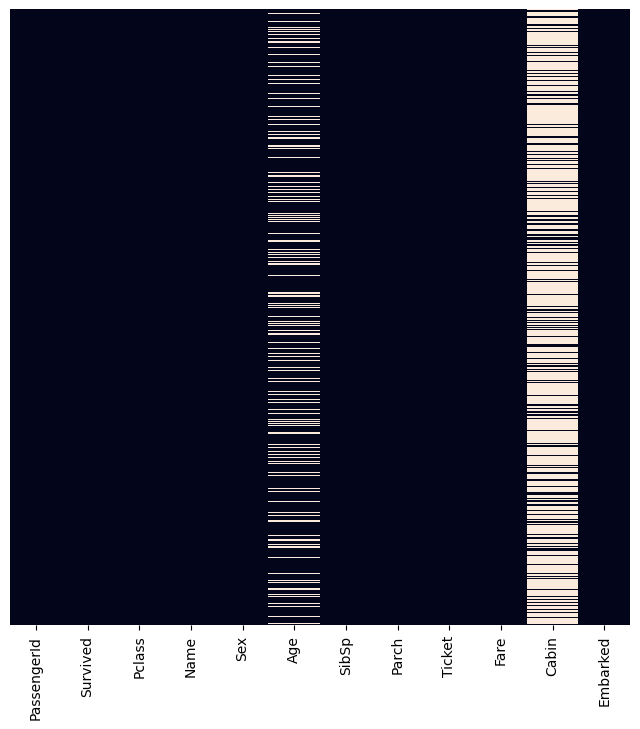

In [159]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False);

In [160]:
# test 
na_vars_test = [var for var in test.columns if test[var].isnull().sum()]
[print(test[var].isnull().sum() ,"Missing values in", var, round((test[var].isnull().sum()/891)*100, 2), "%") for var in na_vars_test];

86 Missing values in Age 9.65 %
1 Missing values in Fare 0.11 %
327 Missing values in Cabin 36.7 %


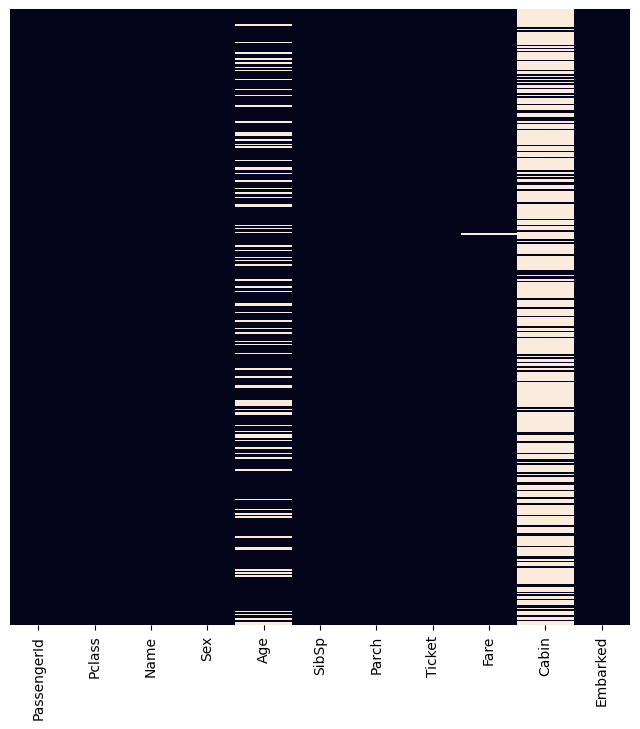

In [161]:
plt.figure(figsize=(8, 8))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False);

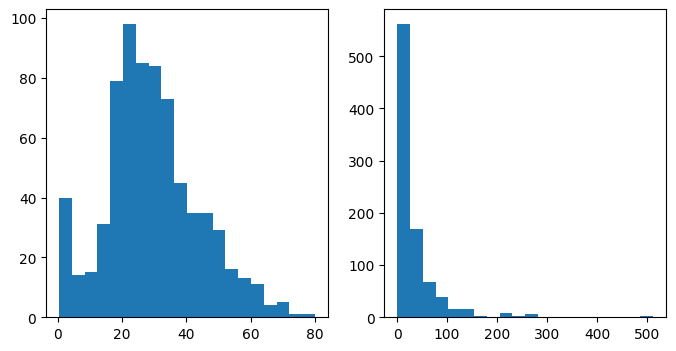

In [162]:
# to fill the missing values in Age and Fare, we have to check their distributions
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(train["Age"], bins=20)

plt.subplot(122)
plt.hist(train["Fare"], bins=20);

In [163]:
# for Age, it is better to fill it with median value
# same goes for the Fare

In [164]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [165]:
# it is better to fille Embarked with mode, i.e, "S"

In [166]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [167]:
# Since Cabin values start with letters and range from A-G and T, we can assume the people with missing cabin
# information travlled without one and label all of them with a single alphabet, say "H"

In [168]:
# using Name to fill missing values in Age

for dataset in data:
    for i in dataset["Name"]:
        dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.")

train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [169]:
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [170]:
pd.crosstab(test.Title, test.Sex)

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [171]:
mapping = {
    "Capt": "Mr", "Col": "Mr", "Don": "Mr", "Jonkheer": "Mr", "Major": "Mr", "Rev": "Mr", "Sir": "Mr",
    "Mlle": "Miss", "Mme": "Miss", "Lady": "Mrs", "Countess": "Mrs", "Ms": "Miss",  "Dona": "Mrs"
}

for dataset in data:
    dataset.replace({"Title": mapping}, inplace=True)

In [172]:
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Dr,1,6
Master,0,40
Miss,186,0
Mr,0,531
Mrs,127,0


In [173]:
pd.crosstab(test.Title, test.Sex)

Sex,female,male
Title,,
Dr,0,1
Master,0,21
Miss,79,0
Mr,0,244
Mrs,73,0


In [174]:
# Age imputation from median age of Title

titles = list(train.Title.unique())

for dataset in data:
    for title in titles:
        imputed_age = dataset.groupby("Title")["Age"].median()[titles.index(title)]
        dataset.loc[((dataset.Age.isnull()) & (train.Title == title)), "Age"] = imputed_age

In [175]:
# filling missing values of Embarked, Fare and Cabin with fillna()

for dataset in data:
    dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace=True)
    dataset.Fare.fillna(dataset.Fare.median(), inplace=True)
    dataset.Cabin.fillna("H", inplace=True)

In [176]:
# train.pivot_table(index=["Ticket"], aggfunc="size")

In [177]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [178]:
# no missing values

### Creating

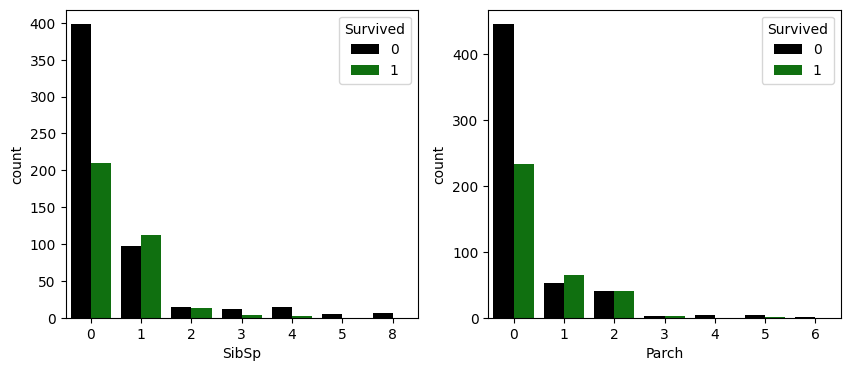

In [179]:
# relationship of Survived with SibSp/Parch
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.countplot(train, x="SibSp", hue="Survived", palette={0: "black", 1: "green"})

plt.subplot(122)
sns.countplot(train, x="Parch", hue="Survived", palette={0: "black", 1: "green"});

In [180]:
for dataset in data:
    dataset["Family"] = dataset["SibSp"] + dataset["Parch"] + 1 # 1 for the person themself
    dataset["isAlone"] = 1
    dataset["isAlone"].loc[dataset["Family"] > 1] = 0 # if family, then mark isAlone False

In [181]:
# extracting cabin class from Cabin

for dataset in data:
    dataset.Cabin = dataset.apply(lambda row: row.Cabin[0], axis=1)

train.Cabin.unique()

array(['H', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [182]:
# Age and Fare bins

for dataset in data:
    dataset["FareBin"] = pd.qcut(dataset.Fare, 5)
    dataset["AgeBin"] = pd.cut(dataset.Age.astype(int), 5)

In [183]:
train.FareBin.unique()

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [184]:
train.AgeBin.unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [185]:
# dataset.Family_survival

### Converting

In [186]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,isAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,H,S,Mr,2,0,"(-0.001, 7.854]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,H,S,Miss,1,1,"(7.854, 10.5]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2,0,"(39.688, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,H,S,Mr,1,1,"(7.854, 10.5]","(32.0, 48.0]"


In [187]:
for dataset in data:
    dataset.Sex.replace(["male", "female"], [0, 1], inplace=True)

In [188]:
le = LabelEncoder()

for dataset in data:
    dataset["Embarked_le"] = le.fit_transform(dataset.Embarked)
    dataset["Title_le"] = le.fit_transform(dataset.Title)
    dataset["FareBin_le"] = le.fit_transform(dataset.FareBin)
    dataset["AgeBin_le"] = le.fit_transform(dataset.AgeBin)
    dataset["Cabin_le"] = le.fit_transform(dataset.Cabin)

In [189]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family',
        'isAlone', 'FareBin', 'AgeBin', 'Embarked_le', 'Title_le', 'FareBin_le',
        'AgeBin_le', 'Cabin_le'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family', 'isAlone',
        'FareBin', 'AgeBin', 'Embarked_le', 'Title_le', 'FareBin_le',
        'AgeBin_le', 'Cabin_le'],
       dtype='object'))

In [190]:
train_df = train.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 
                       'Fare', 'Cabin', 'Embarked', 'Title', 'FareBin', 'AgeBin'],
                      axis=1)

test_df = test.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 
                       'Fare', 'Cabin', 'Embarked', 'Title', 'FareBin', 'AgeBin'],
                      axis=1)

train_df.columns, test_df.columns

(Index(['Survived', 'Pclass', 'Sex', 'Family', 'isAlone', 'Embarked_le',
        'Title_le', 'FareBin_le', 'AgeBin_le', 'Cabin_le'],
       dtype='object'),
 Index(['Pclass', 'Sex', 'Family', 'isAlone', 'Embarked_le', 'Title_le',
        'FareBin_le', 'AgeBin_le', 'Cabin_le'],
       dtype='object'))

In [191]:
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [192]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [194]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 9), (623,), (268, 9), (268,))

### Feature Selection

In [195]:
# removing features with 0 variance (using VarianceThreshold "constant feature removal")

vt_selector = VarianceThreshold()
vt_selector.fit(X_train)

VarianceThreshold()

In [196]:
vt_selector.get_support().sum()

9

In [197]:
# no column removed

In [198]:
# using "quasi-constant feature removal"

vt_selector = VarianceThreshold(0.01)
vt_selector.fit(X_train)

VarianceThreshold(threshold=0.01)

In [199]:
vt_selector.get_support().sum()

9

In [200]:
# no column removed

In [201]:
# using filter method: Correlation among featues

def correlation(dataset, threshold=0.8):
    corr_columns = set()
    corr_mat = dataset.corr()
    
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > threshold:
                corr_col_name = corr_mat.columns[i]
                corr_columns.add(corr_col_name)
    return corr_columns

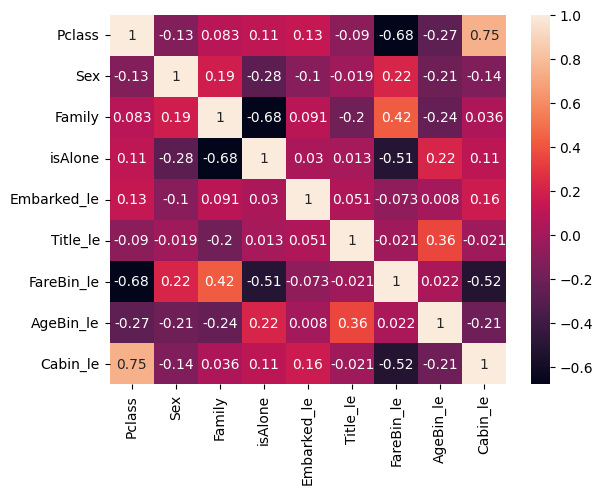

In [202]:
sns.heatmap(X_train.corr(), annot=True);

In [203]:
corr_features = correlation(X_train)
corr_features

set()

In [204]:
# no column removed by correlation filtering

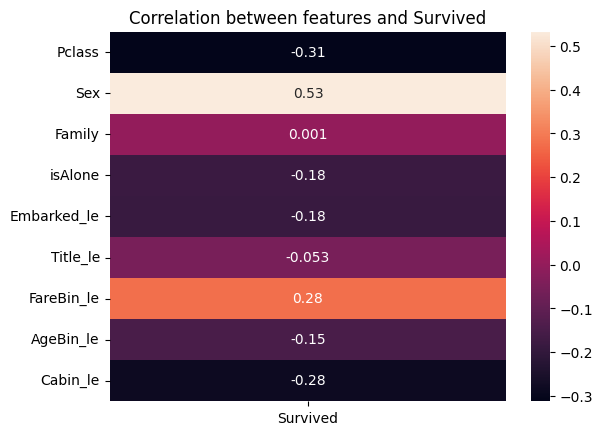

In [205]:
X_y = X_train.copy()
X_y["Survived"] = y_train

plt.title("Correlation between features and Survived")
sns.heatmap(X_y.corr()[["Survived"]].drop(labels="Survived"), annot=True);

In [206]:
# Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

    return vif

In [207]:
vif(X_train)

,features,VIF
0,Pclass,26.824697
1,Sex,1.694747
2,Family,5.791280
3,isAlone,4.540641
4,Embarked_le,5.299197
5,Title_le,15.450370
6,FareBin_le,5.554616
7,AgeBin_le,5.020999
8,Cabin_le,22.228874


In [208]:
# should remove PClass, Title_le and Cabin_le as VIF > 10

In [209]:
def run_random_forest_classification(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=42)
    rfc.fit(X_train, y_train)
    
    pred = rfc.predict_proba(X_train)
    print(f"Train roc_auc_score: {roc_auc_score(y_train, pred[:, 1])}")

    pred = rfc.predict_proba(X_test)
    print(f"Test roc_auc_score: {roc_auc_score(y_test, pred[:, 1])}")

In [210]:
run_random_forest_classification(X_train, X_test, y_train, y_test)

Train roc_auc_score: 0.8901680802191007
Test roc_auc_score: 0.891059849658576


In [211]:
# Using wrapper methods
# forward selection

sfs = SFS(RandomForestClassifier(), 
          k_features=7,
          scoring="roc_auc",
          cv=3,
          n_jobs=-1)


sfs.fit(X_train, y_train)
selected_features_f = X_train.columns[list(sfs.k_feature_idx_)]

In [212]:
# backward selection

sfs = SFS(RandomForestClassifier(),
          forward=False,
          k_features=7,
          scoring="roc_auc",
          cv=3,
          n_jobs=-1)


sfs.fit(X_train.values, y_train)
selected_features_b = X_train.columns[list(sfs.k_feature_idx_)]

In [213]:
print("ForwardSFS", list(selected_features_f))
print("BackwardSFS", list(selected_features_b))

ForwardSFS ['Pclass', 'Sex', 'Family', 'isAlone', 'Title_le', 'FareBin_le', 'Cabin_le']
BackwardSFS ['Pclass', 'Sex', 'Family', 'isAlone', 'Title_le', 'FareBin_le', 'Cabin_le']


In [214]:
run_random_forest_classification(X_train[selected_features_f], 
                                 X_test[selected_features_f],
                                 y_train, y_test)

Train roc_auc_score: 0.8784952292605354
Test roc_auc_score: 0.8820795317610604


In [215]:
run_random_forest_classification(X_train[selected_features_b], 
                                 X_test[selected_features_b],
                                 y_train, y_test)

Train roc_auc_score: 0.8784952292605354
Test roc_auc_score: 0.8820795317610604


In [216]:
# in both cases accuracy has decreased

In [217]:
# efs = EFS(RandomForestClassifier(),
#           min_features=1,
#           max_features=7,
#           scoring="roc_auc",
#           print_progress=True,
#           cv=2,
#           n_jobs=-1)

# efs.fit(X_train.values, y_train)

In [218]:
# selected_features_efs = X_train.columns[list(efs.best_idx_)]
# selected_features_efs

In [219]:
# run_random_forest_classification(X_train[selected_features_efs], 
#                                  X_test[selected_features_efs],
#                                  y_train, y_test)

In [220]:
# accuracy has decreased

### Embedded Methods

In [221]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression

In [222]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [223]:
m_sel = SelectFromModel(LogisticRegression(C=1, penalty="l1", solver='liblinear'))
m_sel.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [224]:
m_sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [225]:
X_train.columns[m_sel.get_support()]

Index(['Pclass', 'Sex', 'Family', 'isAlone', 'Embarked_le', 'Title_le',
       'FareBin_le', 'AgeBin_le', 'Cabin_le'],
      dtype='object')

In [226]:
vif(X_train)

,features,VIF
0,Pclass,26.824697
1,Sex,1.694747
2,Family,5.791280
3,isAlone,4.540641
4,Embarked_le,5.299197
5,Title_le,15.450370
6,FareBin_le,5.554616
7,AgeBin_le,5.020999
8,Cabin_le,22.228874


### Finalizing feature selection

In [227]:
# removing Title_le and Cabin_le according to VIF method

train_FS = train_df.drop(["Title_le", "Cabin_le"], axis=1)
test_FS = test_df.drop(["Title_le", "Cabin_le"], axis=1)

train_FS.columns

Index(['Survived', 'Pclass', 'Sex', 'Family', 'isAlone', 'Embarked_le',
       'FareBin_le', 'AgeBin_le'],
      dtype='object')

In [228]:
X = train_FS.drop(["Survived"], axis=1)
y = train_FS["Survived"]

### Splitting the data into train and test

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [230]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 7), (623,), (268, 7), (268,))

In [231]:
X_train.head()

,Pclass,Sex,Family,isAlone,Embarked_le,FareBin_le,AgeBin_le
445,1,0,3,0,2,4,0
650,3,0,1,1,2,1,2
172,3,1,3,0,2,2,0
450,2,0,4,0,2,3,2
314,2,0,3,0,2,3,2


In [232]:
vif(X_train)

,features,VIF
0,Pclass,8.431685
1,Sex,1.649850
2,Family,5.433325
3,isAlone,4.516702
4,Embarked_le,5.109107
5,FareBin_le,4.285981
6,AgeBin_le,3.842101


### Standardization

In [233]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Performing EDA with statistics

In [234]:
### 

In [235]:
train_FS.columns

Index(['Survived', 'Pclass', 'Sex', 'Family', 'isAlone', 'Embarked_le',
       'FareBin_le', 'AgeBin_le'],
      dtype='object')

In [236]:
# discrete variable correlation with Survived

disc = ['Pclass', 'Sex', 'Family', 'isAlone', 'Embarked_le',
       'FareBin_le', 'AgeBin_le']

for x in disc:
    if train_FS[x].dtype != "float64":
        print("Correlation of Survived with:", x)
        print(train_FS[[x, "Survived"]].groupby(x, as_index=False).mean())
        print("#"*10, "\n")

Correlation of Survived with: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
########## 

Correlation of Survived with: Sex
   Sex  Survived
0    0  0.188908
1    1  0.742038
########## 

Correlation of Survived with: Family
   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000
########## 

Correlation of Survived with: isAlone
   isAlone  Survived
0        0  0.505650
1        1  0.303538
########## 

Correlation of Survived with: Embarked_le
   Embarked_le  Survived
0            0  0.553571
1            1  0.389610
2            2  0.339009
########## 

Correlation of Survived with: FareBin_le
   FareBin_le  Survived
0           0  0.217877
1           1  0.201087
2           2  0.424419
3           3  0.444444
4           4  0.642045
########## 

Correlation of Survived with: AgeBin_le
   AgeBin_le  S

In [237]:
# visualizations

# Model Data

In [238]:
# Machine Learning Algorithm selection and initialization

MLA = [
    # Ensemble methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Linear models
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    # Nearest Neighbors
    neighbors.KNeighborsClassifier(),

    # SVM
    svm.SVC(probability=True),
        #NuSVC

    # Trees
    tree.DecisionTreeClassifier(),

    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
        # quadratic

    # XGBoost
    XGBClassifier()
]

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix

def print_model_score(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)

    print("--- Training Result ---\n")
    print(f"Accuracy: {accuracy_score(y_train, y_pred):.4f}")
    print(f"Classification Report:\n {classification_report(y_train, y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_train, y_pred)}")

    cvs = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
    mean_cvs = np.mean(cvs)

    print(f"Average accuracy: {mean_cvs:.4f}")
    print(f"SD accuracy: {np.std(cvs):.4f}")

In [240]:
# for clf in MLA:
#     print("- "*20)
#     print(clf)
#     print_model_score(clf, X_train, y_train)
#     print("- "*20)

In [241]:
# model comparison

columns = ["Name", "Parameters", "Train Accuracy Mean", "Train Accuracy STD", "Test Accuracy", "Time_Taken"]
comparison = pd.DataFrame(columns=columns)

row_idx = 0

for clf in MLA:
    comparison.loc[row_idx, "Name"] = clf.__class__.__name__
    comparison.loc[row_idx, "Parameters"] = str(clf.get_params())

    cv_result = cross_validate(clf, X_train, y_train, cv=20)

    comparison.loc[row_idx, "Time_Taken"] = cv_result["fit_time"].mean()
    comparison.loc[row_idx, "Train Accuracy Mean"] = cv_result["test_score"].mean()
    comparison.loc[row_idx, "Train Accuracy STD"] = cv_result["test_score"].std()

    clf.fit(X_train, y_train)
    comparison.loc[row_idx, "Test Accuracy"] = accuracy_score(y_test, clf.predict(X_test))

    row_idx += 1
    
comparison.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)
comparison

,Name,Parameters,Train Accuracy Mean,Train Accuracy STD,Test Accuracy,Time_Taken
11,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.809375,0.085367,0.817164,0.046587
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.815675,0.078311,0.809701,0.170439
4,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.799597,0.093542,0.809701,0.114123
14,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.807661,0.076438,0.809701,0.046604
6,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.735534,0.097814,0.798507,0.003151
10,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.826915,0.082792,0.798507,0.00136
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.797883,0.087718,0.791045,0.08731
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.822077,0.076202,0.787313,0.104952
5,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.798085,0.095528,0.787313,0.003279
12,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.80131,0.071803,0.787313,0.00148


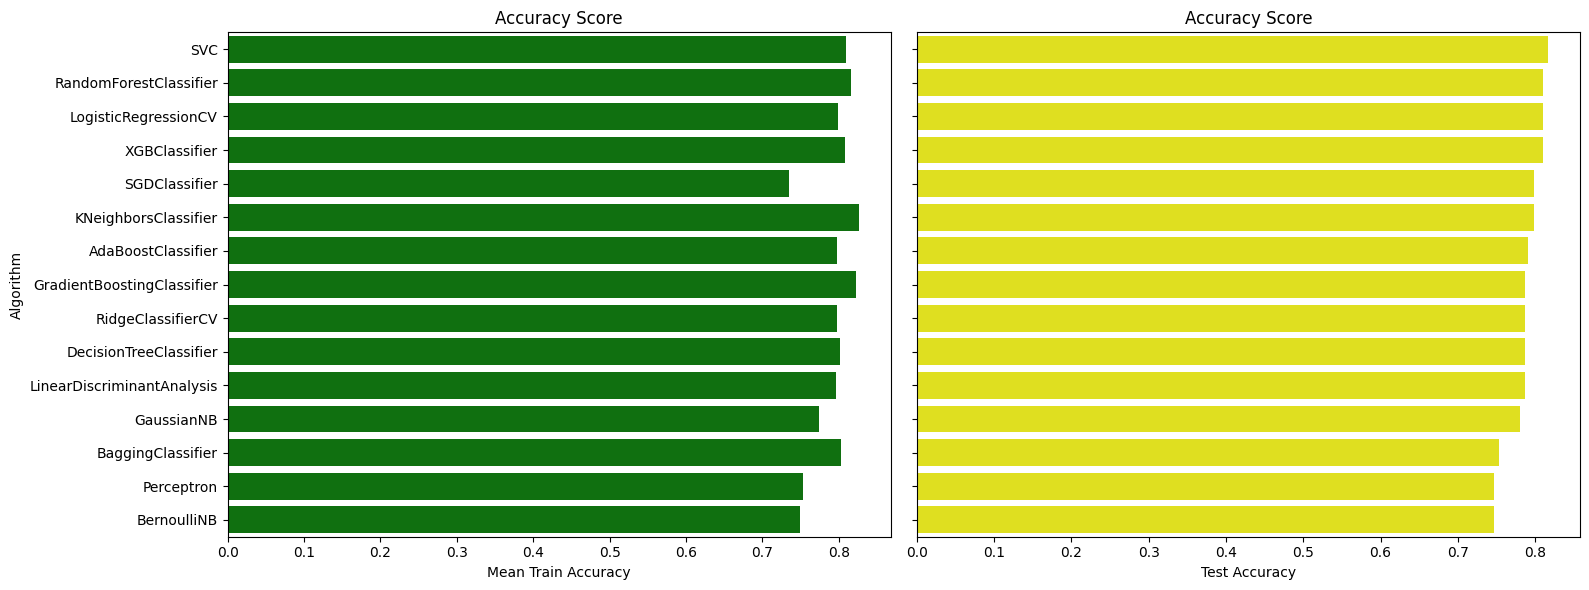

In [242]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
sns.barplot(comparison, x="Train Accuracy Mean", y="Name", color="green")
plt.title("Accuracy Score")
plt.xlabel("Mean Train Accuracy")
plt.ylabel("Algorithm")

plt.subplot(122)
sns.barplot(comparison, x="Test Accuracy", y="Name", color="yellow")
plt.title("Accuracy Score")
plt.xlabel("Test Accuracy")
plt.ylabel("")
plt.gca().set_yticklabels([])
plt.tight_layout();

In [243]:
# best according to mean training accuracy - KNeighborsClassifier 
# best according to test accuracy - SVC

# Hyperparameter Tuning

In [244]:
# tuning hyperparameters of KNeighborsClassifier

knc = neighbors.KNeighborsClassifier()

param_grid = {
                "n_neighbors": [3, 5, 10, 15], # default=5
                "weights": ["uniform", "distance"], # default="uniform"
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], # default="auto"
                "p": [1, 2, 3, 5], # default=2 # Euclidean
                "n_jobs": [-1]}

gs = GridSearchCV(knc, param_grid=param_grid, cv=3)

gs.fit(X_train, y_train)
gs.best_estimator_

KNeighborsClassifier(algorithm='brute', n_jobs=-1, p=3)

In [245]:
best_knc = gs.best_estimator_
print(best_knc.get_params())

best_knc.fit(X_train, y_train)

y_pred = best_knc.predict(X_train)

print("Train Result:\n")
print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_train, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred)))
print('*'*50)

y_pred = best_knc.predict(X_test)


print("Test Result:\n")
print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred)))

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}
Train Result:

Accuracy score: 0.8555

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       392
           1       0.84      0.75      0.79       231

    accuracy                           0.86       623
   macro avg       0.85      0.83      0.84       623
weighted avg       0.85      0.86      0.85       623


Confusion Matrix: 
 [[359  33]
 [ 57 174]]

**************************************************
Test Result:

Accuracy score: 0.7873

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.76      0.70      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0

In [246]:
# tuning hyperparameters of SVC

svc = svm.SVC()

param_grid = {
                'C': [0.01, 0.1, 1, 10], #default=1.0
                'gamma': [.1, .25, .5, .75, 1.0], #edfault: auto
                'decision_function_shape': ['ovo', 'ovr'], #default:ovr
                'probability': [True],
             }

gs = GridSearchCV(svc, param_grid=param_grid, cv=3)

gs.fit(X_train, y_train)
gs.best_estimator_

SVC(C=1, decision_function_shape='ovo', gamma=0.5, probability=True)

In [247]:
best_svc = gs.best_estimator_
print(best_svc.get_params())

best_svc.fit(X_train, y_train)

y_pred = best_svc.predict(X_train)

print("Train Result:\n")
print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_train, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_pred)))
print('*'*50)

y_pred = best_svc.predict(X_test)


print("Test Result:\n")
print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred)))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 0.5, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Train Result:

Accuracy score: 0.8636

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.90       392
           1       0.88      0.73      0.80       231

    accuracy                           0.86       623
   macro avg       0.87      0.84      0.85       623
weighted avg       0.87      0.86      0.86       623


Confusion Matrix: 
 [[370  22]
 [ 63 168]]

**************************************************
Test Result:

Accuracy score: 0.7985

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.68      0.74       111

    accuracy 

# Submission

In [248]:
test_FS = test[X.columns]

In [249]:
svc = gs.best_estimator_

svc.fit(X, y)

predictions = svc.predict(test_FS)

my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
my_submission.to_csv('submission.csv', index=False)

print("Submission file created.")

Submission file created.


In [250]:
# got accuracy of - 0.7488

In [251]:
# dropping 'Embarked_le' and checking accuracy
train_FS.columns

Index(['Survived', 'Pclass', 'Sex', 'Family', 'isAlone', 'Embarked_le',
       'FareBin_le', 'AgeBin_le'],
      dtype='object')

In [269]:
train_FS1 = train_df.drop(['Title_le', 'Cabin_le','Embarked_le' ],axis=1)
test_FS1 = test_df.drop (['Title_le', 'Cabin_le', 'Embarked_le'], axis=1)

X1 = train_FS1.drop('Survived', axis=1)
y1 = train_FS1['Survived']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size= 0.3, random_state=42)

# model comparison

columns = ["Name", "Parameters", "Train Accuracy Mean", "Train Accuracy STD", "Test Accuracy", "Time_Taken"]
comparison = pd.DataFrame(columns=columns)

row_idx = 0

for clf in MLA:
    comparison.loc[row_idx, "Name"] = clf.__class__.__name__
    comparison.loc[row_idx, "Parameters"] = str(clf.get_params())

    cv_result = cross_validate(clf, X_train1, y_train1, cv=20)

    comparison.loc[row_idx, "Time_Taken"] = cv_result["fit_time"].mean()
    comparison.loc[row_idx, "Train Accuracy Mean"] = cv_result["test_score"].mean()
    comparison.loc[row_idx, "Train Accuracy STD"] = cv_result["test_score"].std()

    clf.fit(X_train1, y_train1)
    comparison.loc[row_idx, "Test Accuracy"] = accuracy_score(y_test1, clf.predict(X_test1))

    row_idx += 1
    
comparison.sort_values(by=["Train Accuracy Mean"], ascending=False, inplace=True)
comparison

,Name,Parameters,Train Accuracy Mean,Train Accuracy STD,Test Accuracy,Time_Taken
11,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.817288,0.088161,0.824627,0.052439
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.817238,0.070328,0.794776,0.114258
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.817187,0.066013,0.783582,0.17528
14,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.813962,0.074573,0.802239,0.054351
12,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.801109,0.060022,0.761194,0.002972
10,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.799496,0.08172,0.809701,0.002827
4,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.796421,0.095822,0.824627,0.178717
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.794708,0.090626,0.787313,0.091175
5,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.793196,0.090283,0.791045,0.004817
13,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.793196,0.090283,0.791045,0.003281
